In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from sklearn.metrics import pairwise_distances_argmin

In [13]:
# Load sample image
china = load_sample_image("china.jpg")
china = np.array(china, dtype=np.float64) / 255

In [14]:
# Reshape the image to a 2D array of pixels
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

In [15]:
# Shuffle the pixels to get a representative sample
image_array_sample = shuffle(image_array, random_state=0, n_samples=1000)

In [16]:
# Perform K-means clustering on the image pixels
import warnings
warnings.filterwarnings('ignore')
kmeans = KMeans(n_clusters=64, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

In [17]:
# Reconstruct the compressed image using K-means centroids
d = kmeans.cluster_centers_.shape[1]
compressed_image = np.zeros((w, h, d))
label_idx = 0
for i in range(w):
    for j in range(h):
        compressed_image[i][j] = kmeans.cluster_centers_[labels[label_idx]]
        label_idx += 1

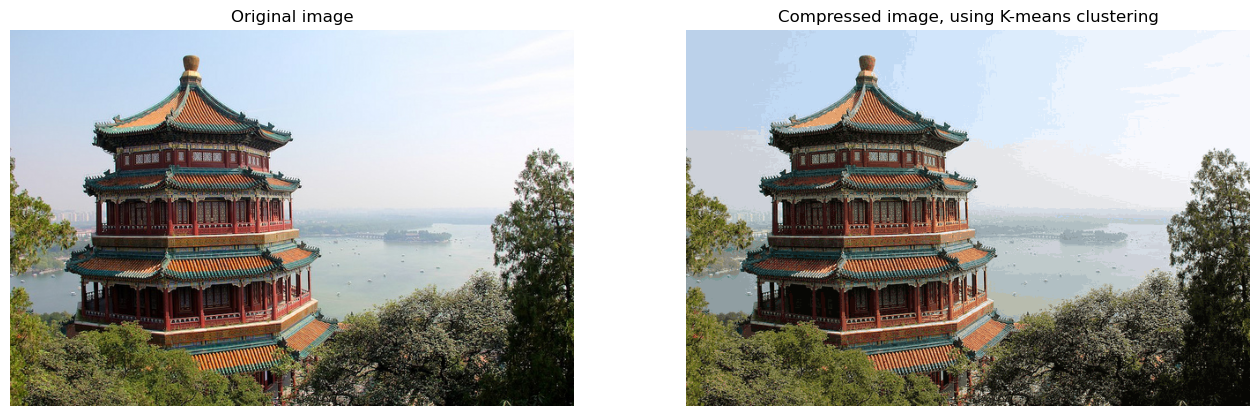

In [18]:
# Display the original and compressed images side by side
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].imshow(china)
ax[0].axis('off')
ax[0].set_title('Original image')
ax[1].imshow(compressed_image)
ax[1].axis('off')
ax[1].set_title('Compressed image, using K-means clustering')
plt.show()